In [1]:
import pandas as pd
import seaborn as sns

# Load the CSV file
df = pd.read_csv('sampled_data.csv')

# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nColumn Names:")
print(df.columns.tolist())
print("\nFirst few rows:")
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nBasic Statistics:")
print(df.describe())

Dataset Shape: (800, 12)

Column Names:
['User_ID', 'Age', 'Gender', 'Sleep_Duration', 'Stress_Level', 'Diet_Type', 'Daily_Screen_Time', 'Exercise_Frequency', 'Caffeine_Intake', 'Reaction_Time', 'Memory_Test_Score', 'Cognitive_Score']

First few rows:
  User_ID  Age Gender  Sleep_Duration  Stress_Level       Diet_Type  \
0  U47045   23   Male             6.8             2  Non-Vegetarian   
1  U44296   23   Male             8.8             9  Non-Vegetarian   
2  U74784   25   Male             8.2             4  Non-Vegetarian   
3  U70976   52   Male             5.4             7  Non-Vegetarian   
4  U46646   29   Male             7.8             9  Non-Vegetarian   

   Daily_Screen_Time Exercise_Frequency  Caffeine_Intake  Reaction_Time  \
0                3.8             Medium              403         375.24   
1                6.6               High              105         388.40   
2                9.0                Low              340         381.09   
3                9.7 

In [2]:
df_data = pd.DataFrame(df['Reaction_Time'])

In [3]:
df_sub = df[["Age", "Sleep_Duration", "Stress_Level", "Daily_Screen_Time",'Reaction_Time']]
print(df_sub.describe())

              Age  Sleep_Duration  Stress_Level  Daily_Screen_Time  \
count  800.000000      800.000000    800.000000         800.000000   
mean    37.996250        6.962000      5.335000           6.433875   
std     11.996401        1.744437      2.876738           3.313724   
min     18.000000        4.000000      1.000000           1.000000   
25%     28.000000        5.400000      3.000000           3.400000   
50%     39.000000        7.050000      5.000000           6.400000   
75%     48.000000        8.400000      8.000000           9.400000   
max     59.000000       10.000000     10.000000          12.000000   

       Reaction_Time  
count     800.000000  
mean      405.239250  
std       117.613589  
min       201.880000  
25%       300.115000  
50%       407.370000  
75%       510.052500  
max       599.610000  


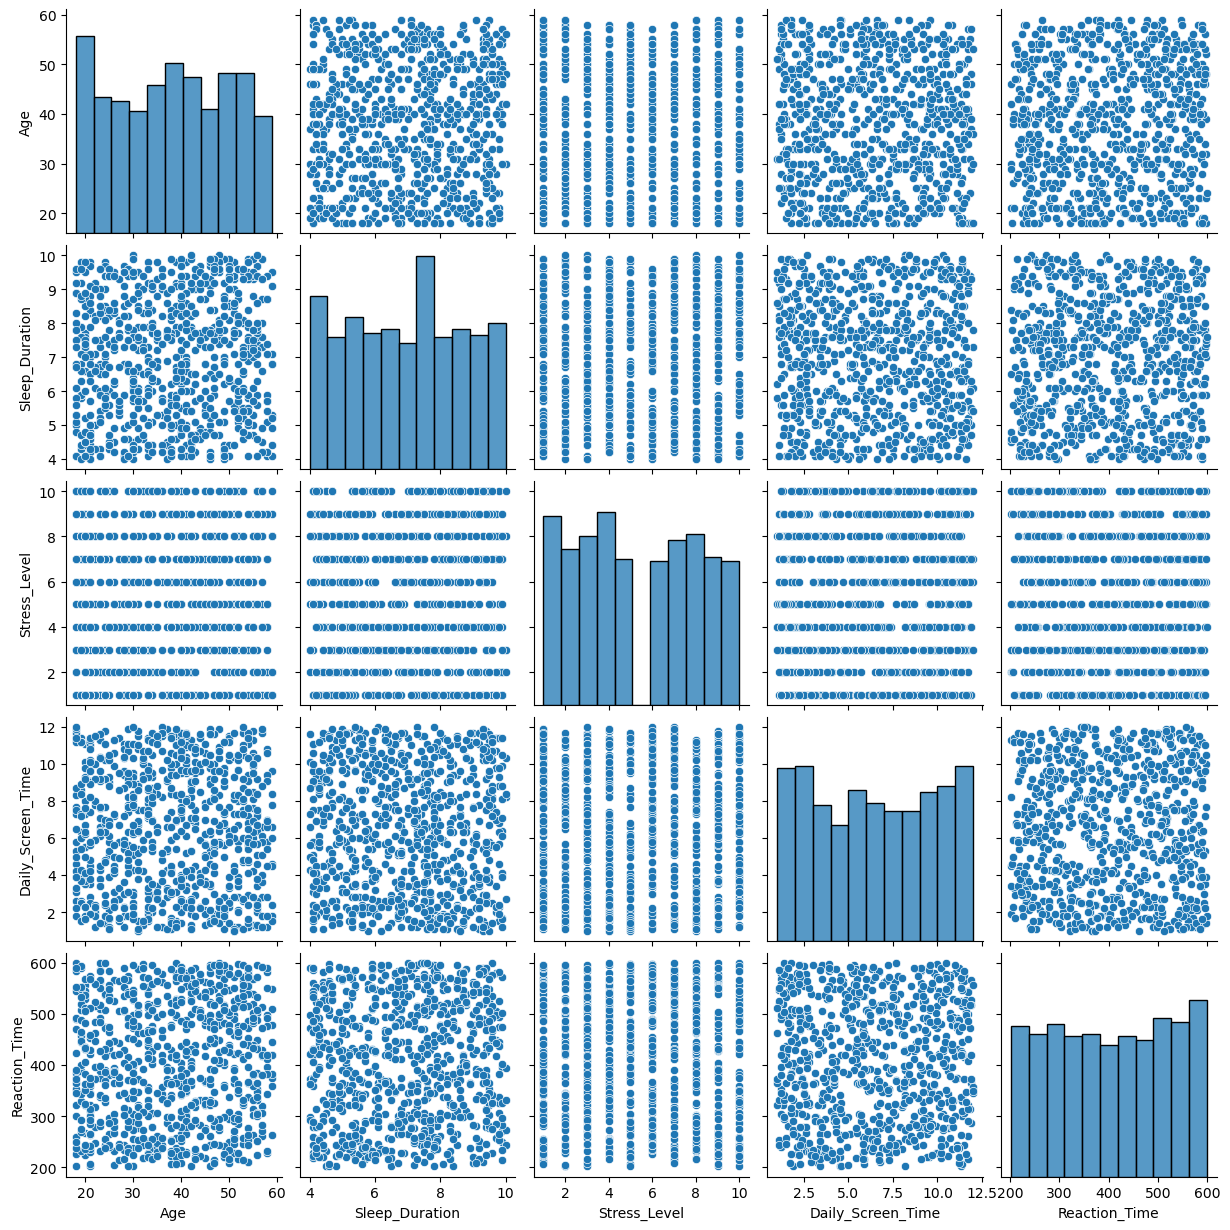

In [4]:
sns.pairplot(df_sub)

In [5]:
mat = df_sub.corr(method = 'pearson')
mat

,Age,Sleep_Duration,Stress_Level,Daily_Screen_Time,Reaction_Time
Age,1.000000,0.068735,-0.013926,-0.016516,0.047494
Sleep_Duration,0.068735,1.000000,-0.025518,-0.045628,0.045664
Stress_Level,-0.013926,-0.025518,1.000000,0.042252,-0.054895
Daily_Screen_Time,-0.016516,-0.045628,0.042252,1.000000,0.014111
Reaction_Time,0.047494,0.045664,-0.054895,0.014111,1.000000


In [6]:
def interpret_correlation(correlation):
    if correlation > 0.9:
        return "Very strong positive correlation"
    elif correlation > 0.7:
        return "Strong positive correlation"
    elif correlation > 0.5:
        return "Moderate positive correlation"
    elif correlation > 0.3:
        return "Weak positive correlation"
    elif correlation > 0:
        return "Very weak positive correlation"
    elif correlation < -0.9:
        return "Very strong negative correlation"
    elif correlation < -0.7:
        return "Strong negative correlation"
    elif correlation < -0.5:
        return "Moderate negative correlation"
    elif correlation < -0.3:
        return "Weak negative correlation"
    elif correlation < 0:
        return "Very weak negative correlation"
    else:
        return "No correlation"
        
# Apply the interpretation to each value in the matrix
for col in mat.columns:
    for row in mat.index:
        corr_value = mat.loc[row, col]
        interpretation = interpret_correlation(corr_value)
        print(f"Correlation between {row} and {col}: {corr_value:.2f} - {interpretation}")

Correlation between Age and Age: 1.00 - Very strong positive correlation
Correlation between Sleep_Duration and Age: 0.07 - Very weak positive correlation
Correlation between Stress_Level and Age: -0.01 - Very weak negative correlation
Correlation between Daily_Screen_Time and Age: -0.02 - Very weak negative correlation
Correlation between Reaction_Time and Age: 0.05 - Very weak positive correlation
Correlation between Age and Sleep_Duration: 0.07 - Very weak positive correlation
Correlation between Sleep_Duration and Sleep_Duration: 1.00 - Very strong positive correlation
Correlation between Stress_Level and Sleep_Duration: -0.03 - Very weak negative correlation
Correlation between Daily_Screen_Time and Sleep_Duration: -0.05 - Very weak negative correlation
Correlation between Reaction_Time and Sleep_Duration: 0.05 - Very weak positive correlation
Correlation between Age and Stress_Level: -0.01 - Very weak negative correlation
Correlation between Sleep_Duration and Stress_Level: -0.03

<Axes: >

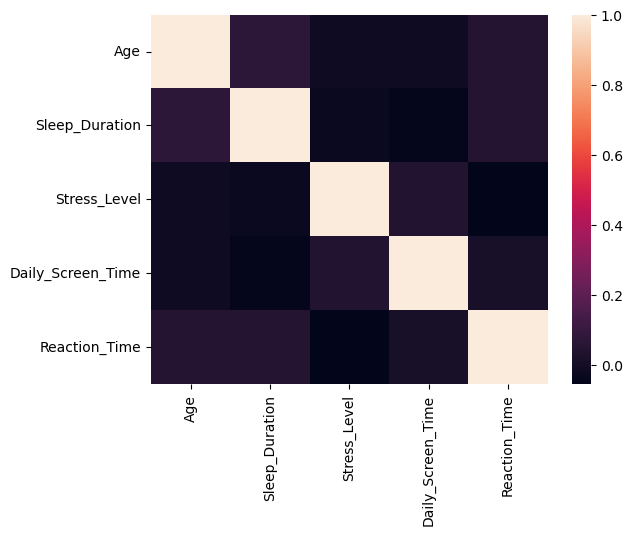

In [7]:
sns.heatmap(mat)

In [8]:
pip install pingouin


Note: you may need to restart the kernel to use updated packages.


In [9]:
# from pingouin import partial_corr

# # Example: correlation between Age and Reaction_Time controlling for others
# result = partial_corr(data=df_sub, x='Age', y='Reaction_Time',
#                       covar=['Sleep_Duration', 'Stress_Level', 'Daily_Screen_Time'])
# print(result)

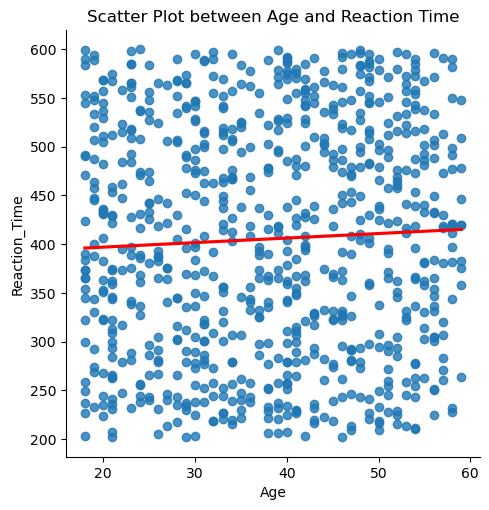

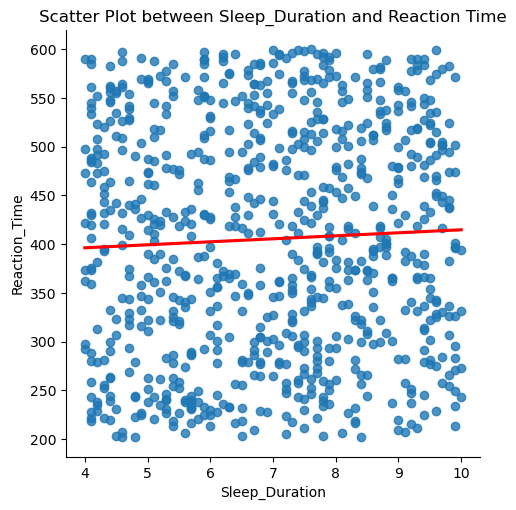

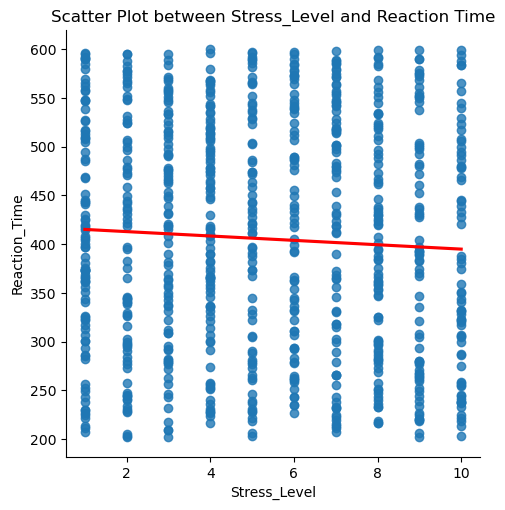

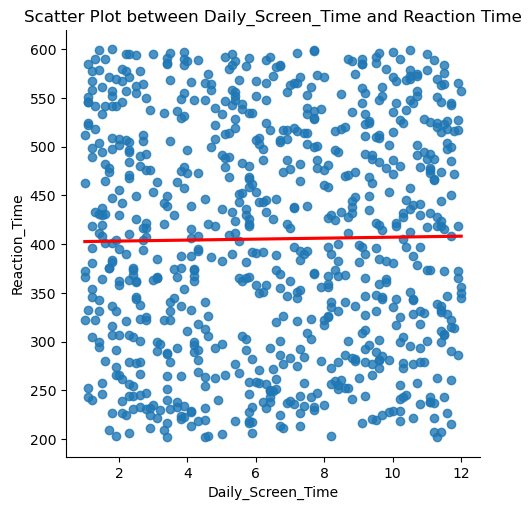

In [10]:


import seaborn as sns
import matplotlib.pyplot as plt

variables = ['Age', 'Sleep_Duration', 'Stress_Level', 'Daily_Screen_Time']

for var in variables:
    sns.lmplot(x=var, y='Reaction_Time', data=df_sub, ci=None, line_kws={'color': 'red'})
    plt.title(f'Scatter Plot between {var} and Reaction Time')
    plt.show()


In [11]:
from scipy.stats import spearmanr

rho, p = spearmanr(df['Stress_Level'], df['Reaction_Time'])
print(f"Spearman correlation = {rho:.3f}, p-value = {p:.3f}")

Spearman correlation = -0.053, p-value = 0.134


In [12]:
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson

model = sm.OLS(df_sub['Reaction_Time'], sm.add_constant(df_sub[['Age', 'Stress_Level', 'Sleep_Duration']])).fit()
print('Durbin-Watson statistic:', durbin_watson(model.resid))  

Durbin-Watson statistic: 1.977000116533365


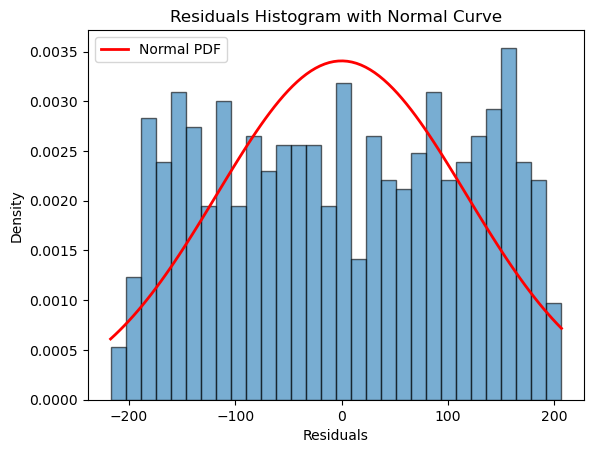

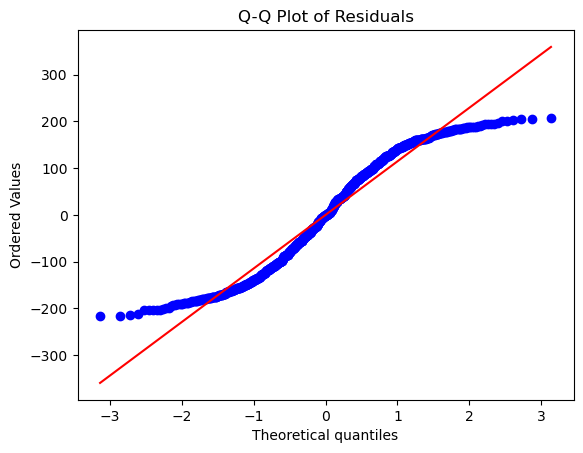

NameError: name 'O' is not defined

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

# Residuals histogram
plt.hist(model.resid, bins=30, edgecolor='black', density=True, alpha=0.6)
plt.title('Residuals Histogram with Normal Curve')
plt.xlabel('Residuals')
plt.ylabel('Density')

# Create a range of x values from the min to max of residuals
x = np.linspace(min(model.resid), max(model.resid), 100)

# Fit a normal distribution to the residuals
mean, std = np.mean(model.resid), np.std(model.resid)

# Compute the normal PDF
pdf = stats.norm.pdf(x, mean, std)

# Plot the bell curve on top of the histogram
plt.plot(x, pdf, color='red', linewidth=2, label='Normal PDF')

plt.legend()
plt.show()

# Q-Q plot
stats.probplot(model.resid, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()
O

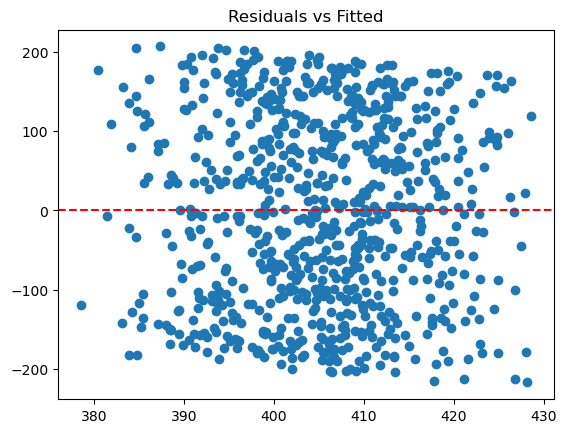

In [15]:
plt.scatter(model.fittedvalues, model.resid)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs Fitted')
plt.show()


Levene's test statistic: 1.278
Levene's p-value: 0.277


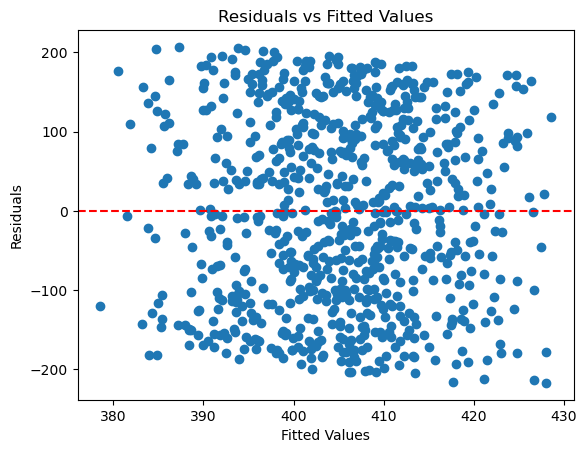

Levene’s test suggests homoscedasticity (equal variance).


In [16]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import scipy.stats as stats
import matplotlib.pyplot as plt

# Fit your regression model
X = df_sub[['Age', 'Stress_Level', 'Sleep_Duration']]  # Example independent variables
y = df_sub['Reaction_Time']

X = sm.add_constant(X)  # Add constant (intercept)
model = sm.OLS(y, X).fit()

# Get the residuals and fitted values
residuals = model.resid
fitted_values = model.fittedvalues

# Bin the fitted values into quantiles (you can adjust the number of bins as needed)
# Example: Dividing into 5 equal groups (quantiles)
num_bins = 5
fitted_values_binned = pd.qcut(fitted_values, num_bins, labels=False)

# Perform Levene's Test for homoscedasticity
levene_stat, levene_p_value = stats.levene(*[residuals[fitted_values_binned == i] for i in range(num_bins)])

# Print the Levene's Test result
print(f"Levene's test statistic: {levene_stat:.3f}")
print(f"Levene's p-value: {levene_p_value:.3f}")

# Plot residuals vs. fitted values for visual inspection
plt.scatter(fitted_values, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

# Interpretation of Levene's test
if levene_p_value < 0.05:
    print("Levene’s test suggests heteroscedasticity (unequal variance).")
else:
    print("Levene’s test suggests homoscedasticity (equal variance).")


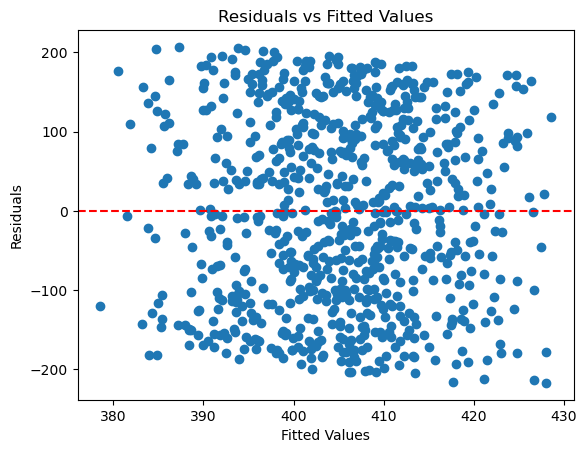

In [17]:
# Plot residuals vs fitted values
plt.scatter(fitted_values, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()


In [18]:
import statsmodels.api as sm
import pandas as pd

# Define dependent (y) and independent (X) variables
X = df_sub['Age']
y = df_sub['Reaction_Time']

# Add constant to the independent variable (for the intercept term)
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

# View the model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:          Reaction_Time   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.804
Date:                Fri, 07 Nov 2025   Prob (F-statistic):              0.180
Time:                        21:50:17   Log-Likelihood:                -4947.7
No. Observations:                 800   AIC:                             9899.
Df Residuals:                     798   BIC:                             9909.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        387.5470     13.812     28.058      0.0

In [19]:
# Define multiple independent variables (X) and dependent variable (y)
X = df_sub[['Age', 'Sleep_Duration', 'Stress_Level', 'Daily_Screen_Time']]
y = df_sub['Reaction_Time']

# Add constant to the independent variables
X = sm.add_constant(X)

# Fit the model

model = sm.OLS(y, X).fit()

# View the model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:          Reaction_Time   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.452
Date:                Fri, 07 Nov 2025   Prob (F-statistic):              0.215
Time:                        21:50:18   Log-Likelihood:                -4945.7
No. Observations:                 800   AIC:                             9901.
Df Residuals:                     795   BIC:                             9925.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               376.4496     24.11